In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import bar_chart_race as bcr
import matplotlib.pyplot as plt
#from geopy.geocoders import Nominatim
#from geopy.extra.rate_limiter import RateLimiter
import folium
import plotly.graph_objs as go
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, BasicTickFormatter
from bokeh.palettes import Spectral4
from folium.plugins import HeatMap

In [31]:
df = pd.concat(map(lambda file: pd.read_csv(file, on_bad_lines='skip', low_memory=False), ['Chicago_Crimes_2001_to_2004.csv', 'Chicago_Crimes_2005_to_2007.csv', 'Chicago_Crimes_2008_to_2011.csv', 'Chicago_Crimes_2012_to_2017.csv', 'Chicago_Crimes_2017_to_2020.csv', 'Chicago_Crimes_2021_to_2023.csv']))

In [34]:
df.sort_values(by='Date', ascending=False, inplace=True)

In [35]:
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
446122,446123,12939906,JG101710,12/31/2022 12:59:00 PM,011XX N MONITOR AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,...,29.0,25.0,11,NaN,NaN,2022.0,01/07/2023 03:53:31 PM,NaN,NaN,NaN
446121,446122,12938420,JF528704,12/31/2022 12:52:00 PM,027XX N ELSTON AVE,560,ASSAULT,SIMPLE,COMMERCIAL / BUSINESS OFFICE,False,...,32.0,22.0,08A,1160488.0,1918000.0,2022.0,01/07/2023 03:53:31 PM,41.930693,-87.685657,"(41.930692897, -87.685656977)"
445845,445846,12937583,JF528218,12/31/2022 12:52:00 AM,010XX S WESTERN AVE,460,BATTERY,SIMPLE,BARBERSHOP,False,...,28.0,28.0,08B,1160538.0,1895456.0,2022.0,01/07/2023 03:53:31 PM,41.868829,-87.686098,"(41.868829303, -87.686098247)"
446120,446121,12937822,JF528703,12/31/2022 12:50:00 PM,070XX S GREEN ST,051A,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,...,6.0,68.0,04A,1171848.0,1858270.0,2022.0,01/07/2023 03:53:31 PM,41.766546,-87.645669,"(41.766545786, -87.64566932)"
446119,446120,12938029,JF528801,12/31/2022 12:50:00 PM,018XX S HAMLIN AVE,560,ASSAULT,SIMPLE,APARTMENT,False,...,24.0,29.0,08A,1151347.0,1890681.0,2022.0,01/07/2023 03:53:31 PM,41.855911,-87.719966,"(41.855911352, -87.719966)"


In [36]:
df.drop(['Unnamed: 0', 'ID', 'IUCR', 'FBI Code', 'Block', 'Ward', 'X Coordinate', 'Y Coordinate', 'Year'],inplace=True, axis=1)

In [37]:
df.shape

(9461681, 14)

In [38]:
df.dropna(inplace=True)

In [39]:
df.shape

(8634932, 14)

In [52]:
df.drop_duplicates(subset=['Case Number'], inplace=True)

In [53]:
df.shape

(6967444, 16)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6967444 entries, 446121 to 745
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Case Number           object 
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Community Area        float64
 10  Updated On            object 
 11  Latitude              object 
 12  Longitude             float64
 13  Location              object 
dtypes: bool(2), float64(3), int64(1), object(8)
memory usage: 704.3+ MB


In [10]:
df_cat = df.select_dtypes(include='object').copy()
df_cat.head()

,Case Number,Date,Primary Type,Description,Location Description,Updated On,Latitude,Location
1,HM278933,03/01/2003 12:00:00 AM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,04/15/2016 08:55:02 AM,41.817229,"(41.817229156, -87.637328162)"
4,HM275615,05/01/2003 01:00:00 AM,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,04/15/2016 08:55:02 AM,41.691785,"(41.691784636, -87.635115968)"
6,HM403711,01/01/2001 11:00:00 AM,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,08/29/2006 03:46:28 AM,41.68702,"(41.687020002, -87.60844523)"
7,HM216293,03/15/2003 12:00:00 AM,OTHER OFFENSE,OTHER WEAPONS VIOLATION,RESIDENCE PORCH/HALLWAY,04/15/2016 08:55:02 AM,41.729712,"(41.729712374, -87.653158513)"
9,HM282389,01/01/2003 12:00:00 AM,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,04/15/2016 08:55:02 AM,41.869772,"(41.869772159, -87.708180162)"


In [43]:
print(df['Primary Type'].unique(),len(df['Primary Type'].unique()))

['ASSAULT' 'BATTERY' 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS' 'OTHER OFFENSE'
 'THEFT' 'ROBBERY' 'MOTOR VEHICLE THEFT' 'WEAPONS VIOLATION'
 'DECEPTIVE PRACTICE' 'BURGLARY' 'HOMICIDE' 'SEX OFFENSE'
 'OFFENSE INVOLVING CHILDREN' 'NARCOTICS' 'STALKING'
 'PUBLIC PEACE VIOLATION' 'ARSON' 'CRIMINAL SEXUAL ASSAULT'
 'CONCEALED CARRY LICENSE VIOLATION' 'LIQUOR LAW VIOLATION' 'KIDNAPPING'
 'INTERFERENCE WITH PUBLIC OFFICER' 'CRIM SEXUAL ASSAULT' 'OBSCENITY'
 'HUMAN TRAFFICKING' 'INTIMIDATION' 'PROSTITUTION' 'GAMBLING'
 'NON-CRIMINAL' 'OTHER NARCOTIC VIOLATION' 'PUBLIC INDECENCY' 'RITUALISM'
 'NON - CRIMINAL' 'NON-CRIMINAL (SUBJECT SPECIFIED)'] 35


In [44]:
df['Primary Type'] = df['Primary Type'].str.replace('NON - CRIMINAL','NON-CRIMINAL')

In [45]:
df['Primary Type'] = df['Primary Type'].str.replace(r"\(.*\)","")

C:\Users\Brian.DaSilva\AppData\Local\Temp\ipykernel_33756\3992758225.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Primary Type'] = df['Primary Type'].str.replace(r"\(.*\)","")


In [46]:
df['Primary Type'] = df['Primary Type'].str.replace('NON-CRIMINAL ','NON-CRIMINAL')

In [47]:
df['Primary Type'] = df['Primary Type'].str.replace('MOTOR VEHICLE THEFT','THEFT')

In [86]:
df['Primary Type'] = df['Primary Type'].str.replace('CRIM SEXUAL ASSAULT','CRIMINAL SEXUAL ASSAULT')

In [48]:
print(df['Primary Type'].unique(),len(df['Primary Type'].unique()))

['ASSAULT' 'BATTERY' 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS' 'OTHER OFFENSE'
 'THEFT' 'ROBBERY' 'WEAPONS VIOLATION' 'DECEPTIVE PRACTICE' 'BURGLARY'
 'HOMICIDE' 'SEX OFFENSE' 'OFFENSE INVOLVING CHILDREN' 'NARCOTICS'
 'STALKING' 'PUBLIC PEACE VIOLATION' 'ARSON' 'CRIMINAL SEXUAL ASSAULT'
 'CONCEALED CARRY LICENSE VIOLATION' 'LIQUOR LAW VIOLATION' 'KIDNAPPING'
 'INTERFERENCE WITH PUBLIC OFFICER' 'CRIM SEXUAL ASSAULT' 'OBSCENITY'
 'HUMAN TRAFFICKING' 'INTIMIDATION' 'PROSTITUTION' 'GAMBLING'
 'NON-CRIMINAL' 'OTHER NARCOTIC VIOLATION' 'PUBLIC INDECENCY' 'RITUALISM'] 32


In [49]:
df['rank'] = df.groupby('Primary Type')['Primary Type'].transform('count').rank(method="dense", ascending=False)

In [50]:
df.head(5)

,Case Number,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Community Area,Updated On,Latitude,Longitude,Location,rank
446121,JF528704,12/31/2022 12:52:00 PM,ASSAULT,SIMPLE,COMMERCIAL / BUSINESS OFFICE,False,False,1432,14.0,22.0,01/07/2023 03:53:31 PM,41.930693,-87.685657,"(41.930692897, -87.685656977)",5.0
445845,JF528218,12/31/2022 12:52:00 AM,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,01/07/2023 03:53:31 PM,41.868829,-87.686098,"(41.868829303, -87.686098247)",2.0
446120,JF528703,12/31/2022 12:50:00 PM,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,68.0,01/07/2023 03:53:31 PM,41.766546,-87.645669,"(41.766545786, -87.64566932)",5.0
446119,JF528801,12/31/2022 12:50:00 PM,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,29.0,01/07/2023 03:53:31 PM,41.855911,-87.719966,"(41.855911352, -87.719966)",5.0
446118,JF528687,12/31/2022 12:45:00 PM,CRIMINAL DAMAGE,TO PROPERTY,SMALL RETAIL STORE,False,False,1131,11.0,26.0,01/07/2023 03:53:31 PM,41.874153,-87.735239,"(41.874153389, -87.735238688)",3.0


In [51]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
yearly_counts = df.groupby('Year').size().reset_index(name='Count')

In [192]:
df = df[(df['Year'] >= 2002) & (df['Year'] <= 2023)]

In [54]:
df.head()

,Case Number,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Community Area,Updated On,Latitude,Longitude,Location,rank,Year
446121,JF528704,2022-12-31 12:52:00,ASSAULT,SIMPLE,COMMERCIAL / BUSINESS OFFICE,False,False,1432,14.0,22.0,01/07/2023 03:53:31 PM,41.930693,-87.685657,"(41.930692897, -87.685656977)",5.0,2022
445845,JF528218,2022-12-31 00:52:00,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,01/07/2023 03:53:31 PM,41.868829,-87.686098,"(41.868829303, -87.686098247)",2.0,2022
446120,JF528703,2022-12-31 12:50:00,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,68.0,01/07/2023 03:53:31 PM,41.766546,-87.645669,"(41.766545786, -87.64566932)",5.0,2022
446119,JF528801,2022-12-31 12:50:00,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,29.0,01/07/2023 03:53:31 PM,41.855911,-87.719966,"(41.855911352, -87.719966)",5.0,2022
446118,JF528687,2022-12-31 12:45:00,CRIMINAL DAMAGE,TO PROPERTY,SMALL RETAIL STORE,False,False,1131,11.0,26.0,01/07/2023 03:53:31 PM,41.874153,-87.735239,"(41.874153389, -87.735238688)",3.0,2022


In [85]:
crime_counts = df['Year'].value_counts().reset_index().rename(columns={'index': 'Year', 'Year': 'Count'})


crime_counts = crime_counts.sort_values('Year')
source = ColumnDataSource(crime_counts)

p = figure(title="Count of Crimes Over the Years", x_axis_label='Year', y_axis_label='Count', x_range=(crime_counts['Year'].min(), crime_counts['Year'].max()), width=800, height=400)
p.yaxis.formatter = BasicTickFormatter(use_scientific=False)
p.line(x='Year', y='Count', source=source, line_width=2, color=Spectral4[0], legend_label="Crime Count")

output_notebook()
show(p)

Loading BokehJS ...

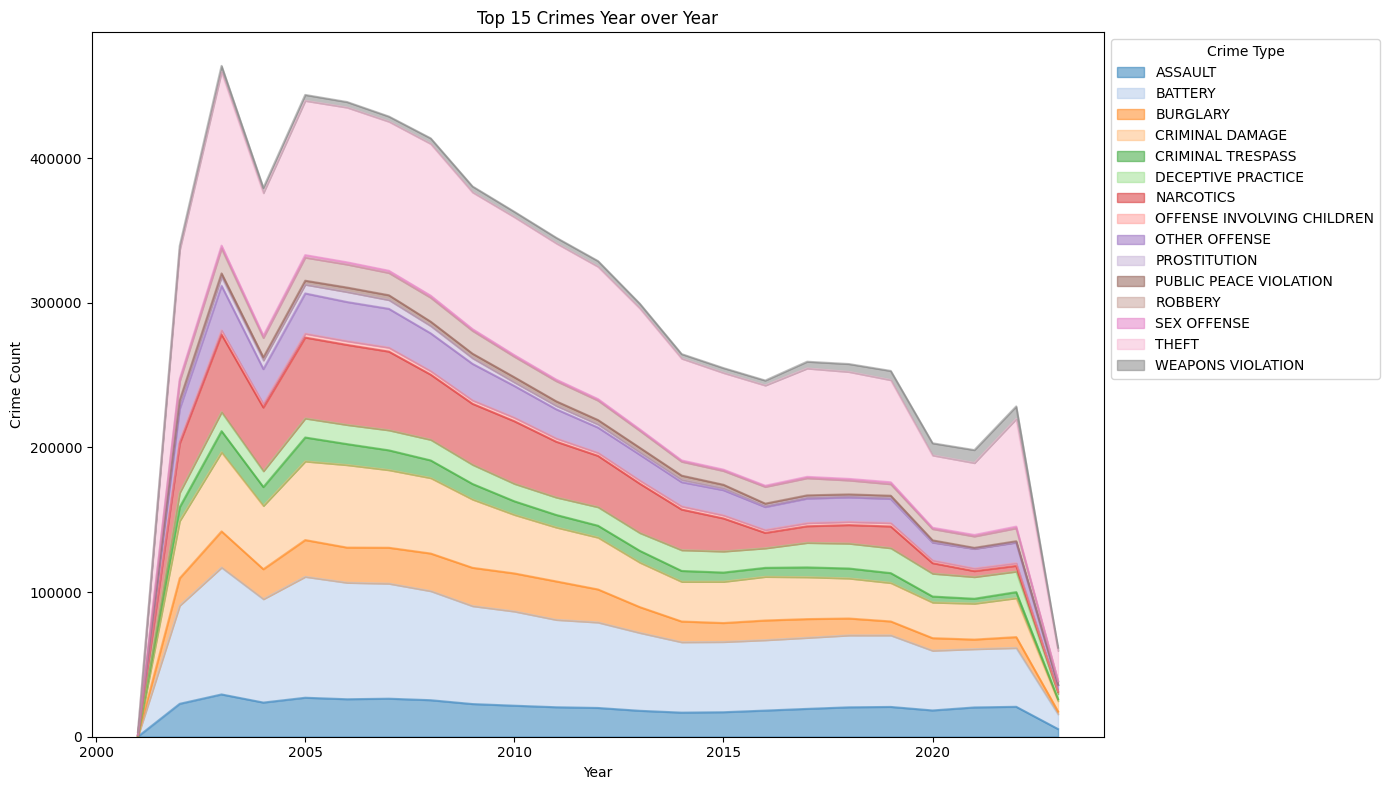

In [62]:
# Filter the dataframe to include only the top 15 crimes
top_15_crimes = df[df['rank'] <= 15]

# Group the data by year and primary type, and count the number of crimes per year for each primary type
yearly_counts = top_15_crimes.groupby(['Year', 'Primary Type']).size().reset_index(name='Count')

# Pivot the data to get the count of crimes per year for each primary type as columns
yearly_counts_pivot = yearly_counts.pivot_table(index='Year', columns='Primary Type', values='Count', fill_value=0)

# Create a ribbon chart (area chart) of the count of top 15 crimes per year
plt.figure(figsize=(14, 8))
sns.set_palette("tab20")
yearly_counts_pivot.plot.area(ax=plt.gca(), alpha=0.5)
plt.title('Top 15 Crimes Year over Year')
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.legend(title='Crime Type', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

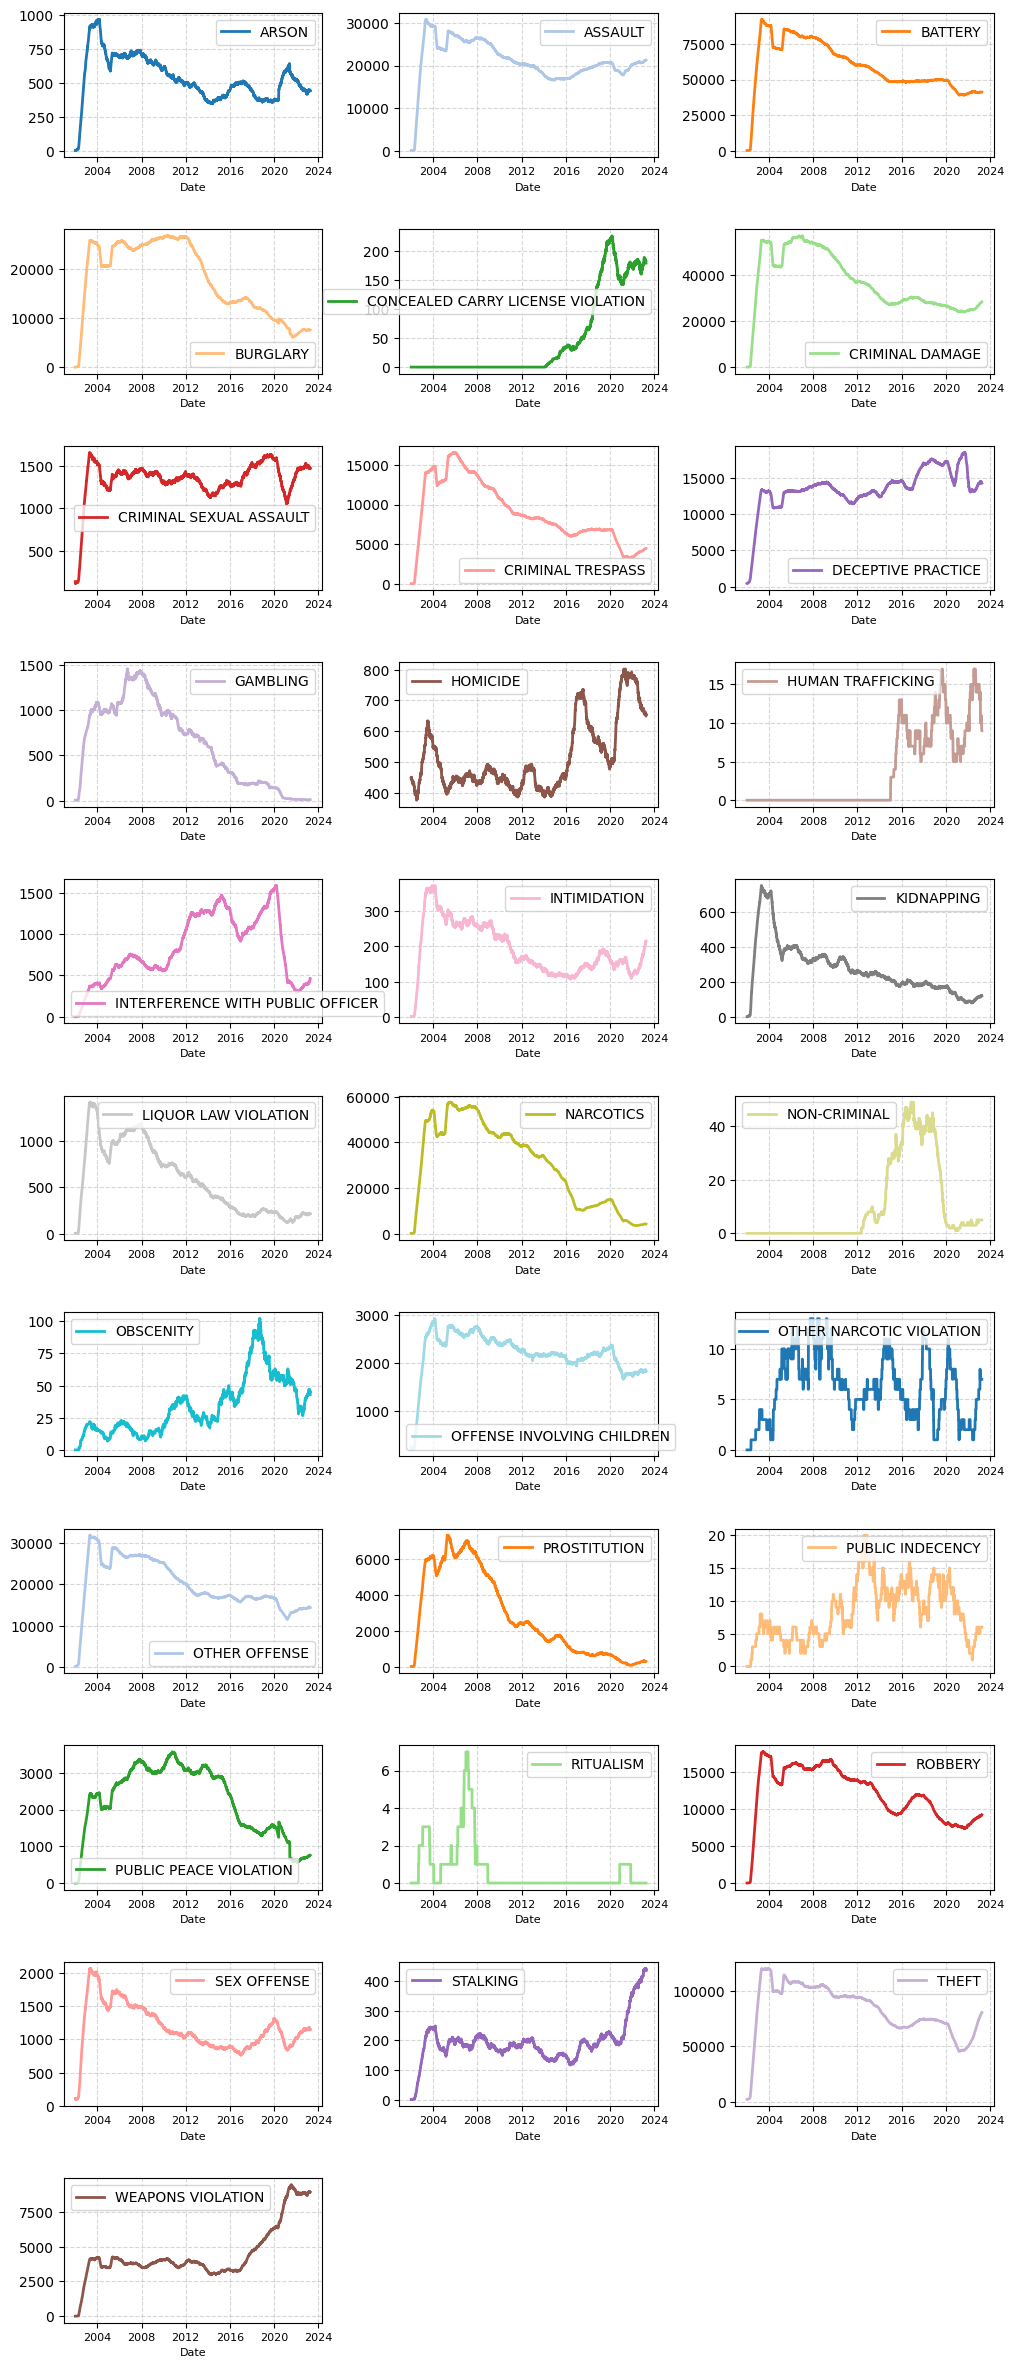

In [87]:
# Set custom color palette
sns.set_palette('husl', n_colors=len(df['Primary Type'].unique()))

crime_by_type = df.pivot_table('Case Number', aggfunc=np.size, columns='Primary Type', index=df['Date'].dt.date, fill_value=0)
crime_by_type.index = pd.DatetimeIndex(crime_by_type.index)
plot = crime_by_type.rolling(365).sum().plot(figsize=(12, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False, linewidth=2)

# Add gridlines and adjust x-axis label fontsize
for ax in plot.flatten():
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xlabel(ax.get_xlabel(), fontsize=8)
    for label in ax.get_xticklabels():
        label.set_fontsize(8)
    
    # Add title for each subplot
    ax.set_title(ax.get_title(), fontsize=10, fontweight='bold', pad=12)

# Customize subplot border
plt.subplots_adjust(hspace=0.5, wspace=0.3)

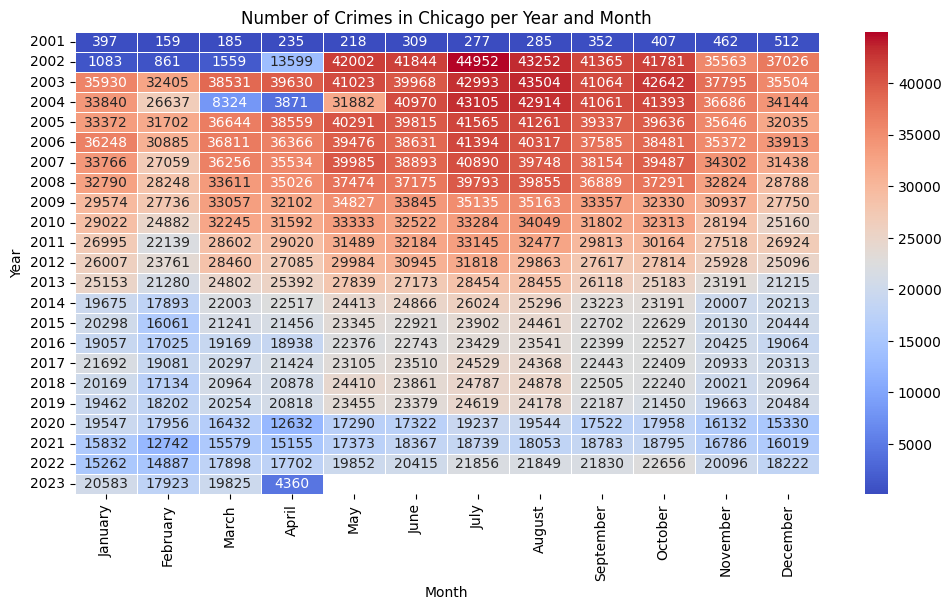

In [57]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.strftime('%B')

year_month_data = df.groupby(['Year', 'Month']).size().reset_index(name='IncidentCount')
year_month_data = year_month_data.pivot(index='Year', columns='Month', values='IncidentCount')

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
year_month_data = year_month_data[month_order]

plt.figure(figsize=(12, 6))
sns.heatmap(year_month_data, cmap='coolwarm', annot=True, fmt='.0f', linewidths=.5)
plt.title('Number of Crimes in Chicago per Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

In [63]:
filtered_df = df[df['rank'] < 15]

grouped_data = filtered_df.groupby(['Year', 'Primary Type']).size().reset_index(name='Count')
pivoted_data = grouped_data.pivot_table(values='Count', index='Year', columns='Primary Type', fill_value=0)

bcr.bar_chart_race(df=pivoted_data, title='Top 15 Crime Types in Chicago Year Over Year')

C:\Users\Brian.DaSilva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\bar_chart_race\_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
C:\Users\Brian.DaSilva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\bar_chart_race\_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))


In [65]:
df['Date'] = pd.to_datetime(df['Date'])
df['Hour'] = df['Date'].dt.hour
df['DayOfWeek'] = df['Date'].dt.dayofweek

def get_time_block(hour):
    if 6 <= hour < 12:
        return 'Morning (6AM-12PM)'
    elif 12 <= hour < 18:
        return 'Afternoon (1-6PM)'
    elif 18 <= hour < 24:
        return 'Evening (7-12AM)'
    else:
        return 'Night (1-5AM)'

df['TimeBlock'] = df['Hour'].apply(get_time_block)
timeblock_counts = df.pivot_table(index='TimeBlock', columns='DayOfWeek', aggfunc='count', fill_value=0)['Case Number']
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

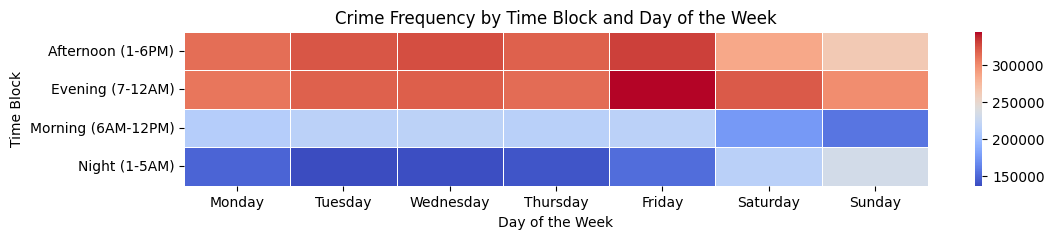

In [66]:
plt.figure(figsize=(12, 2))
sns.heatmap(timeblock_counts, cmap='coolwarm', linewidths=0.5, xticklabels=day_labels)
plt.title('Crime Frequency by Time Block and Day of the Week')
plt.ylabel('Time Block')
plt.xlabel('Day of the Week')
plt.show()

In [58]:
geodata = df.sort_values(by='Date', ascending=False).head(10000)

In [59]:
from geopy.geocoders import ArcGIS
geolocator = ArcGIS(user_agent="geoapiExercises")

def extract_neighborhood(lat, lng):
    if lat is None or lng is None:
        return None
    location = geolocator.reverse((lat, lng))
    try:
        neighborhood = location.raw['Neighborhood']
    except KeyError:
        neighborhood = None
    return neighborhood

geodata['Neighborhood'] = geodata.apply(lambda row: extract_neighborhood(row['Latitude'], row['Longitude']), axis=1)

neighborhood_group = geodata.groupby('Neighborhood').size().reset_index(name='IncidentCount')
neighborhood_lat_lng = geodata.groupby('Neighborhood').agg({'Latitude': 'mean', 'Longitude': 'mean'}).reset_index()
neighborhood_data = neighborhood_group.merge(neighborhood_lat_lng, on='Neighborhood')

In [105]:
neighborhood_data.sort_values(by='IncidentCount', ascending=False)[1:21]

,Neighborhood,IncidentCount,Latitude,Longitude
7,Austin,439,41.889781,-87.756939
83,South Shore,353,41.762842,-87.572452
52,Lawndale,288,41.860481,-87.716659
6,Auburn Gresham,270,41.746204,-87.655637
42,Greater Grand Crossing,270,41.764456,-87.618596
78,Roseland,267,41.704334,-87.623841
65,Near West Side,264,41.872776,-87.667139
45,Humboldt Park,229,41.901386,-87.719730
22,Chatham,228,41.743320,-87.613006
57,Loop,217,41.882938,-87.627781


In [68]:
chicago_map = folium.Map(location=[41.881832, -87.623177], zoom_start=11)

data = neighborhood_data[['Latitude', 'Longitude', 'IncidentCount']]
data = data.dropna()

HeatMap(data, radius=15, blur=25).add_to(chicago_map)

chicago_map

In [92]:
aux = df.groupby('Primary Type')['Arrest'].mean().reset_index()
aux['Arrest (%)'] = aux['Arrest'].round(4) * 100
aux.sort_values('Arrest', inplace=True)

trace = go.Bar(
    x=aux['Arrest (%)'],
    y=aux['Primary Type'],
    orientation='h',
    text=aux['Arrest (%)'].round(1).astype(str) + '%',
    textposition='outside',
    marker=dict(
        color=aux['Arrest (%)'],
        colorscale='Blugrn',
        line=dict(color='rgb(8,48,107)', width=1.5)
    ),
    opacity=0.8
)

layout = go.Layout(
    title='Arrested Rate in % per Type Crime in Chicago',
    xaxis=dict(title='Arrest Rate (%)', tickformat=".1f"),
    yaxis=dict(title='Primary Type'),
    margin=dict(l=200, r=50, t=100, b=50),
    plot_bgcolor='rgb(255, 255, 255)', 
    paper_bgcolor='rgb(255, 255, 255)',
    width=1200, 
    height=800  
)

fig = go.Figure(data=[trace], layout=layout)
fig.show()

In [70]:
grouped_data = df.groupby(["Year", "Arrest"]).size().reset_index(name="Count")
pivot_data = grouped_data.pivot_table(index="Year", columns="Arrest", values="Count", fill_value=0)

pivot_data['Total'] = pivot_data[False] + pivot_data[True]


pivot_data['Not Arrested (%)'] = (pivot_data[False] / pivot_data['Total']) * 100
pivot_data['Arrested (%)'] = (pivot_data[True] / pivot_data['Total']) * 100


percentage_data = pivot_data[['Not Arrested (%)', 'Arrested (%)']]

trace_not_arrested = go.Bar(
    x=percentage_data.index,
    y=percentage_data['Not Arrested (%)'],
    name='Not Arrested',
    text=percentage_data['Not Arrested (%)'].round(1).astype(str) + '%',
    textposition='auto',
    marker=dict(
        color='rgb(75,192,192)',
        line=dict(color='rgb(8,48,107)', width=1.5)
    )
)

trace_arrested = go.Bar(
    x=percentage_data.index,
    y=percentage_data['Arrested (%)'],
    name='Arrested',
    text=percentage_data['Arrested (%)'].round(1).astype(str) + '%',
    textposition='auto',
    marker=dict(
        color='rgb(52,152,219)',
        line=dict(color='rgb(8,48,107)', width=1.5)
    )
)

data = [trace_not_arrested, trace_arrested]

layout = go.Layout(
    title="Yearly Comparison of Arrested vs Not Arrested",
    barmode='stack',
    xaxis=dict(title="Year"),
    yaxis=dict(title="Percentage"),
    plot_bgcolor='rgb(255, 255, 255)',
    paper_bgcolor='rgb(255, 255, 255)',
    width=1200, 
    height=800  
)

fig = go.Figure(data=data, layout=layout)
fig.show()

In [71]:
df["Hour"] = df["Date"].dt.hour

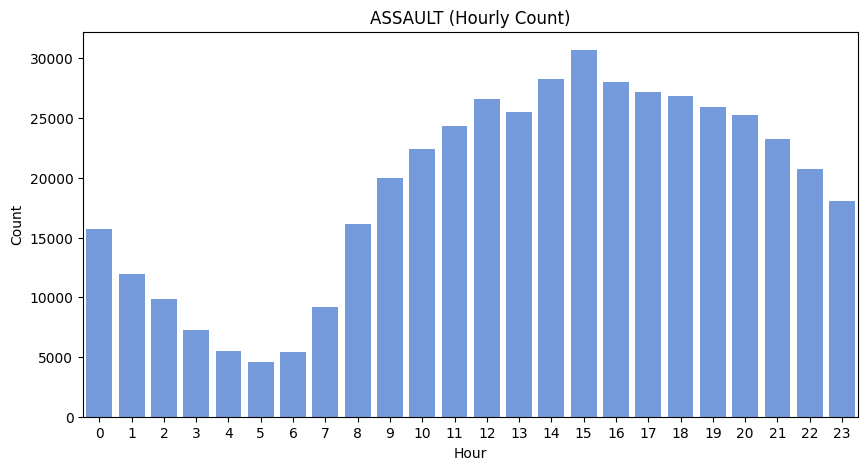

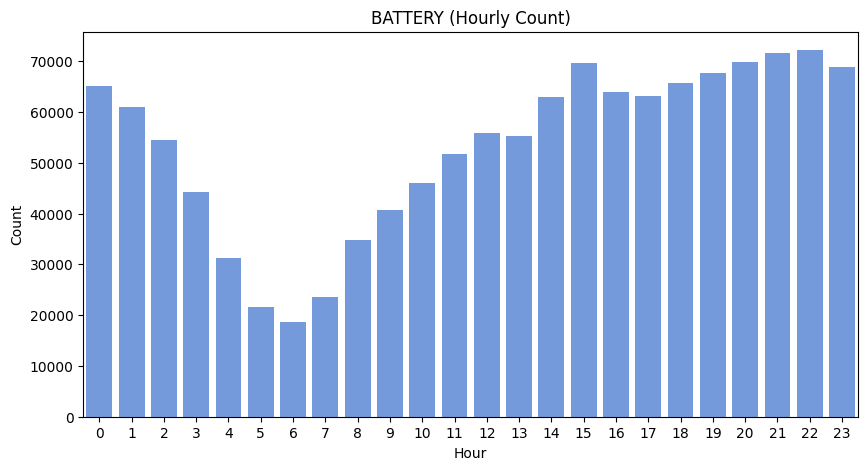

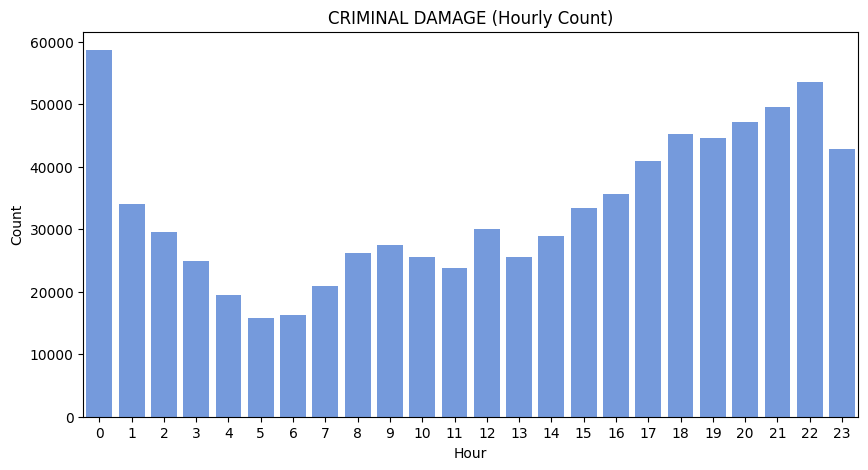

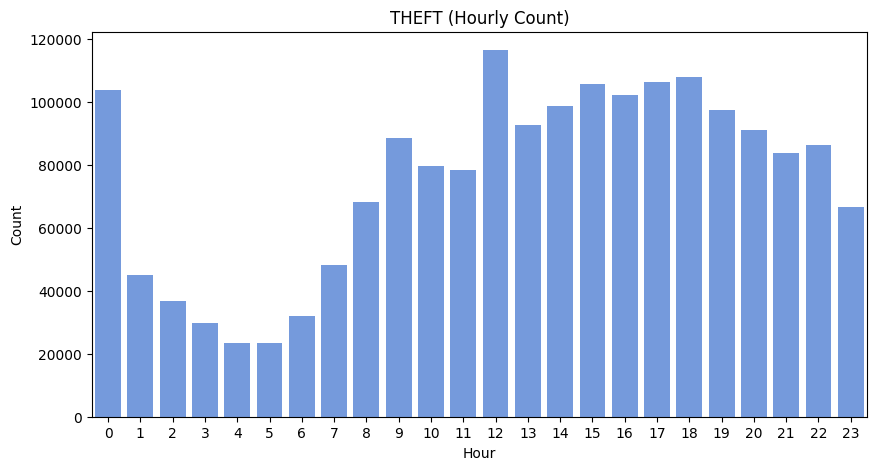

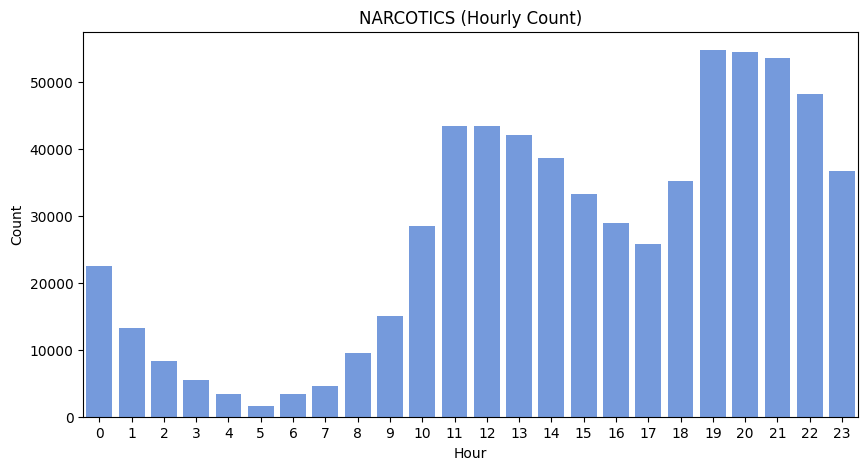

In [72]:
top_5_primary_types = df[df["rank"] <= 5]["Primary Type"].unique()
df_top_5 = df[df["Primary Type"].isin(top_5_primary_types)]

hourly_count = df_top_5.groupby(["Primary Type", "Hour"]).size().reset_index(name="Count")

for primary_type in top_5_primary_types:
    plt.figure(figsize=(10, 5))
    sns.barplot(data=hourly_count[hourly_count["Primary Type"] == primary_type], x="Hour", y="Count", color="cornflowerblue")
    plt.title(f"{primary_type} (Hourly Count)")
    plt.xlabel("Hour")
    plt.ylabel("Count")
    plt.show()


In [243]:
beat_counts = df.groupby("Beat").size().reset_index(name="Incident Count")
beat_counts_sorted = beat_counts.sort_values(by="Incident Count", ascending=False)

print(beat_counts_sorted.head(20))

     Beat  Incident Count
45    423           50909
43    421           50654
68    624           46462
189  1533           45153
52    511           45120
227  1834           44532
131  1112           44061
95    823           43722
184  1522           41514
42    414           41449
300  2533           40473
65    621           40254
62    612           39721
31    321           38407
97    825           38020
75    713           37169
118  1011           37136
55    522           37107
69    631           37097
53    512           36906


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6967444 entries, 446121 to 745
Data columns (total 20 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Case Number           object        
 1   Date                  datetime64[ns]
 2   Primary Type          object        
 3   Description           object        
 4   Location Description  object        
 5   Arrest                bool          
 6   Domestic              bool          
 7   Beat                  int64         
 8   District              float64       
 9   Community Area        float64       
 10  Updated On            object        
 11  Latitude              object        
 12  Longitude             float64       
 13  Location              object        
 14  rank                  float64       
 15  Year                  int64         
 16  Month                 object        
 17  Hour                  int64         
 18  DayOfWeek             int64         
 19 